In [138]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
from sklearn.model_selection import validation_curve
import optuna
from sklearn.metrics import r2_score

In [2]:
data=pd.read_csv(r"C:\Users\Avijit\Desktop\AgriAssure\AGRIYIELDPRO\PROCESSED_DATASET\yield5.csv")

In [3]:
x,y=data.iloc[:,:-1],data.iloc[:,-1:]

In [4]:
y1=np.reshape(y,shape=(-1))


In [5]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y1,train_size=0.8,random_state=32)

In [6]:
y1.shape


(14464,)

In [71]:
def objective(trial):
    # Hyperparameter suggestions
    n_estimators = trial.suggest_int("n_estimators", 100, 150)
    max_depth = trial.suggest_int("max_depth", 2, 20, log=True)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    # Create model
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        n_jobs=-1
    )

    # Fit model
    model.fit(xtrain, ytrain)

    # Predict
    ytrain_pred = model.predict(xtrain)
    ytest_pred = model.predict(xtest)

    # R² scores
    train_r2 = r2_score(ytrain, ytrain_pred)
    test_r2 = r2_score(ytest, ytest_pred)

    # Return test R² to maximize
    return test_r2

In [72]:
study = optuna.create_study(direction="maximize",study_name='randomforest2',storage=r"sqlite:///C:/Users/Avijit/Desktop/AgriAssure/AGRIYIELDPRO/RESULT/RANDOMFOREST/randomforest2.db",load_if_exists=True)
study.optimize(objective, n_trials=30)
best_trial = study.best_trial
print(f"Best Test Accuracy: {best_trial.value}")


[I 2025-07-08 22:13:04,740] A new study created in RDB with name: randomforest2
[I 2025-07-08 22:13:06,026] Trial 0 finished with value: 0.8610384408710317 and parameters: {'n_estimators': 141, 'max_depth': 13, 'min_samples_split': 9, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.8610384408710317.
[I 2025-07-08 22:13:07,060] Trial 1 finished with value: 0.9235782029530617 and parameters: {'n_estimators': 111, 'max_depth': 19, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.9235782029530617.
[I 2025-07-08 22:13:08,230] Trial 2 finished with value: 0.9196164901797933 and parameters: {'n_estimators': 142, 'max_depth': 18, 'min_samples_split': 9, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.9235782029530617.
[I 2025-07-08 22:13:08,728] Trial 3 finished with value: 0.38045093029827015 and parameters: {'n_estimators': 128, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.9235782029530617.
[I 2025-07-0

Best Test Accuracy: 0.9240769447267905


In [73]:
study.best_params

{'n_estimators': 119,
 'max_depth': 20,
 'min_samples_split': 6,
 'min_samples_leaf': 4}

In [112]:
params={
 'n_estimators':124 ,
 'max_depth': 16,
 'min_samples_split': 10,
 'min_samples_leaf': 8
}

In [113]:
model=RandomForestRegressor(**params)
model.fit(xtrain,ytrain)
model.score(xtrain,ytrain),model.score(xtest,ytest)

(0.9335160774365362, 0.9011270109992365)

In [ ]:
degrees=np.arange(1,21)
trainscore,valscore=validation_curve(
    estimator=model,X=xtrain,y=ytrain,param_name='max_depth',param_range=degrees,cv=5,scoring='r2'
)
trainmean=trainscore.mean(axis=1)
valmean=valscore.mean(axis=1)

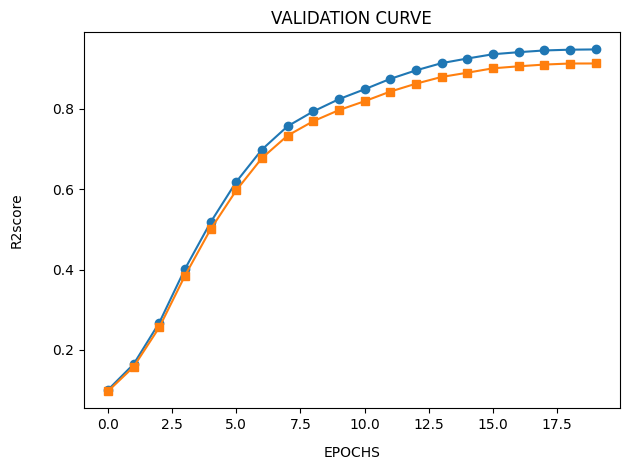

In [116]:
import matplotlib.pyplot as plt
plt.plot(trainmean,label='trainscore',marker='o')
plt.plot(valmean,label='valscore',marker='s')
plt.xlabel("EPOCHS",labelpad=10)
plt.ylabel("R2score",labelpad=20)
plt.title("VALIDATION CURVE")
plt.tight_layout()
plt.show()

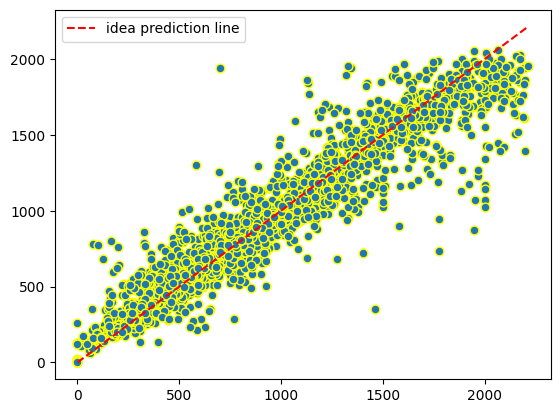

In [137]:
testpred=model.predict(xtest)
plt.scatter(ytest,testpred,s=40,edgecolors='Yellow')
ymin=ytest.min()
ymax=ytest.max()
plt.plot([ymin,ymax],[ymin,ymax],'r--',label='idea prediction line')
plt.legend()
plt.show()

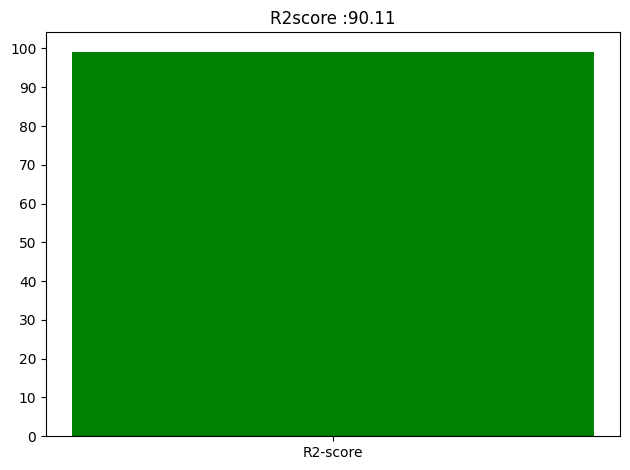

In [184]:
r2=r2_score(ytest,testpred)
mae=mean_absolute_error(ytest,testpred)
score=[mae,r2]
metrics=["R2-score"]
plt.bar(metrics,score,color='green')
plt.yticks(range(0,101,10))
plt.title(f"R2score :{r2*100:.2f}")
plt.tight_layout()
plt.show()


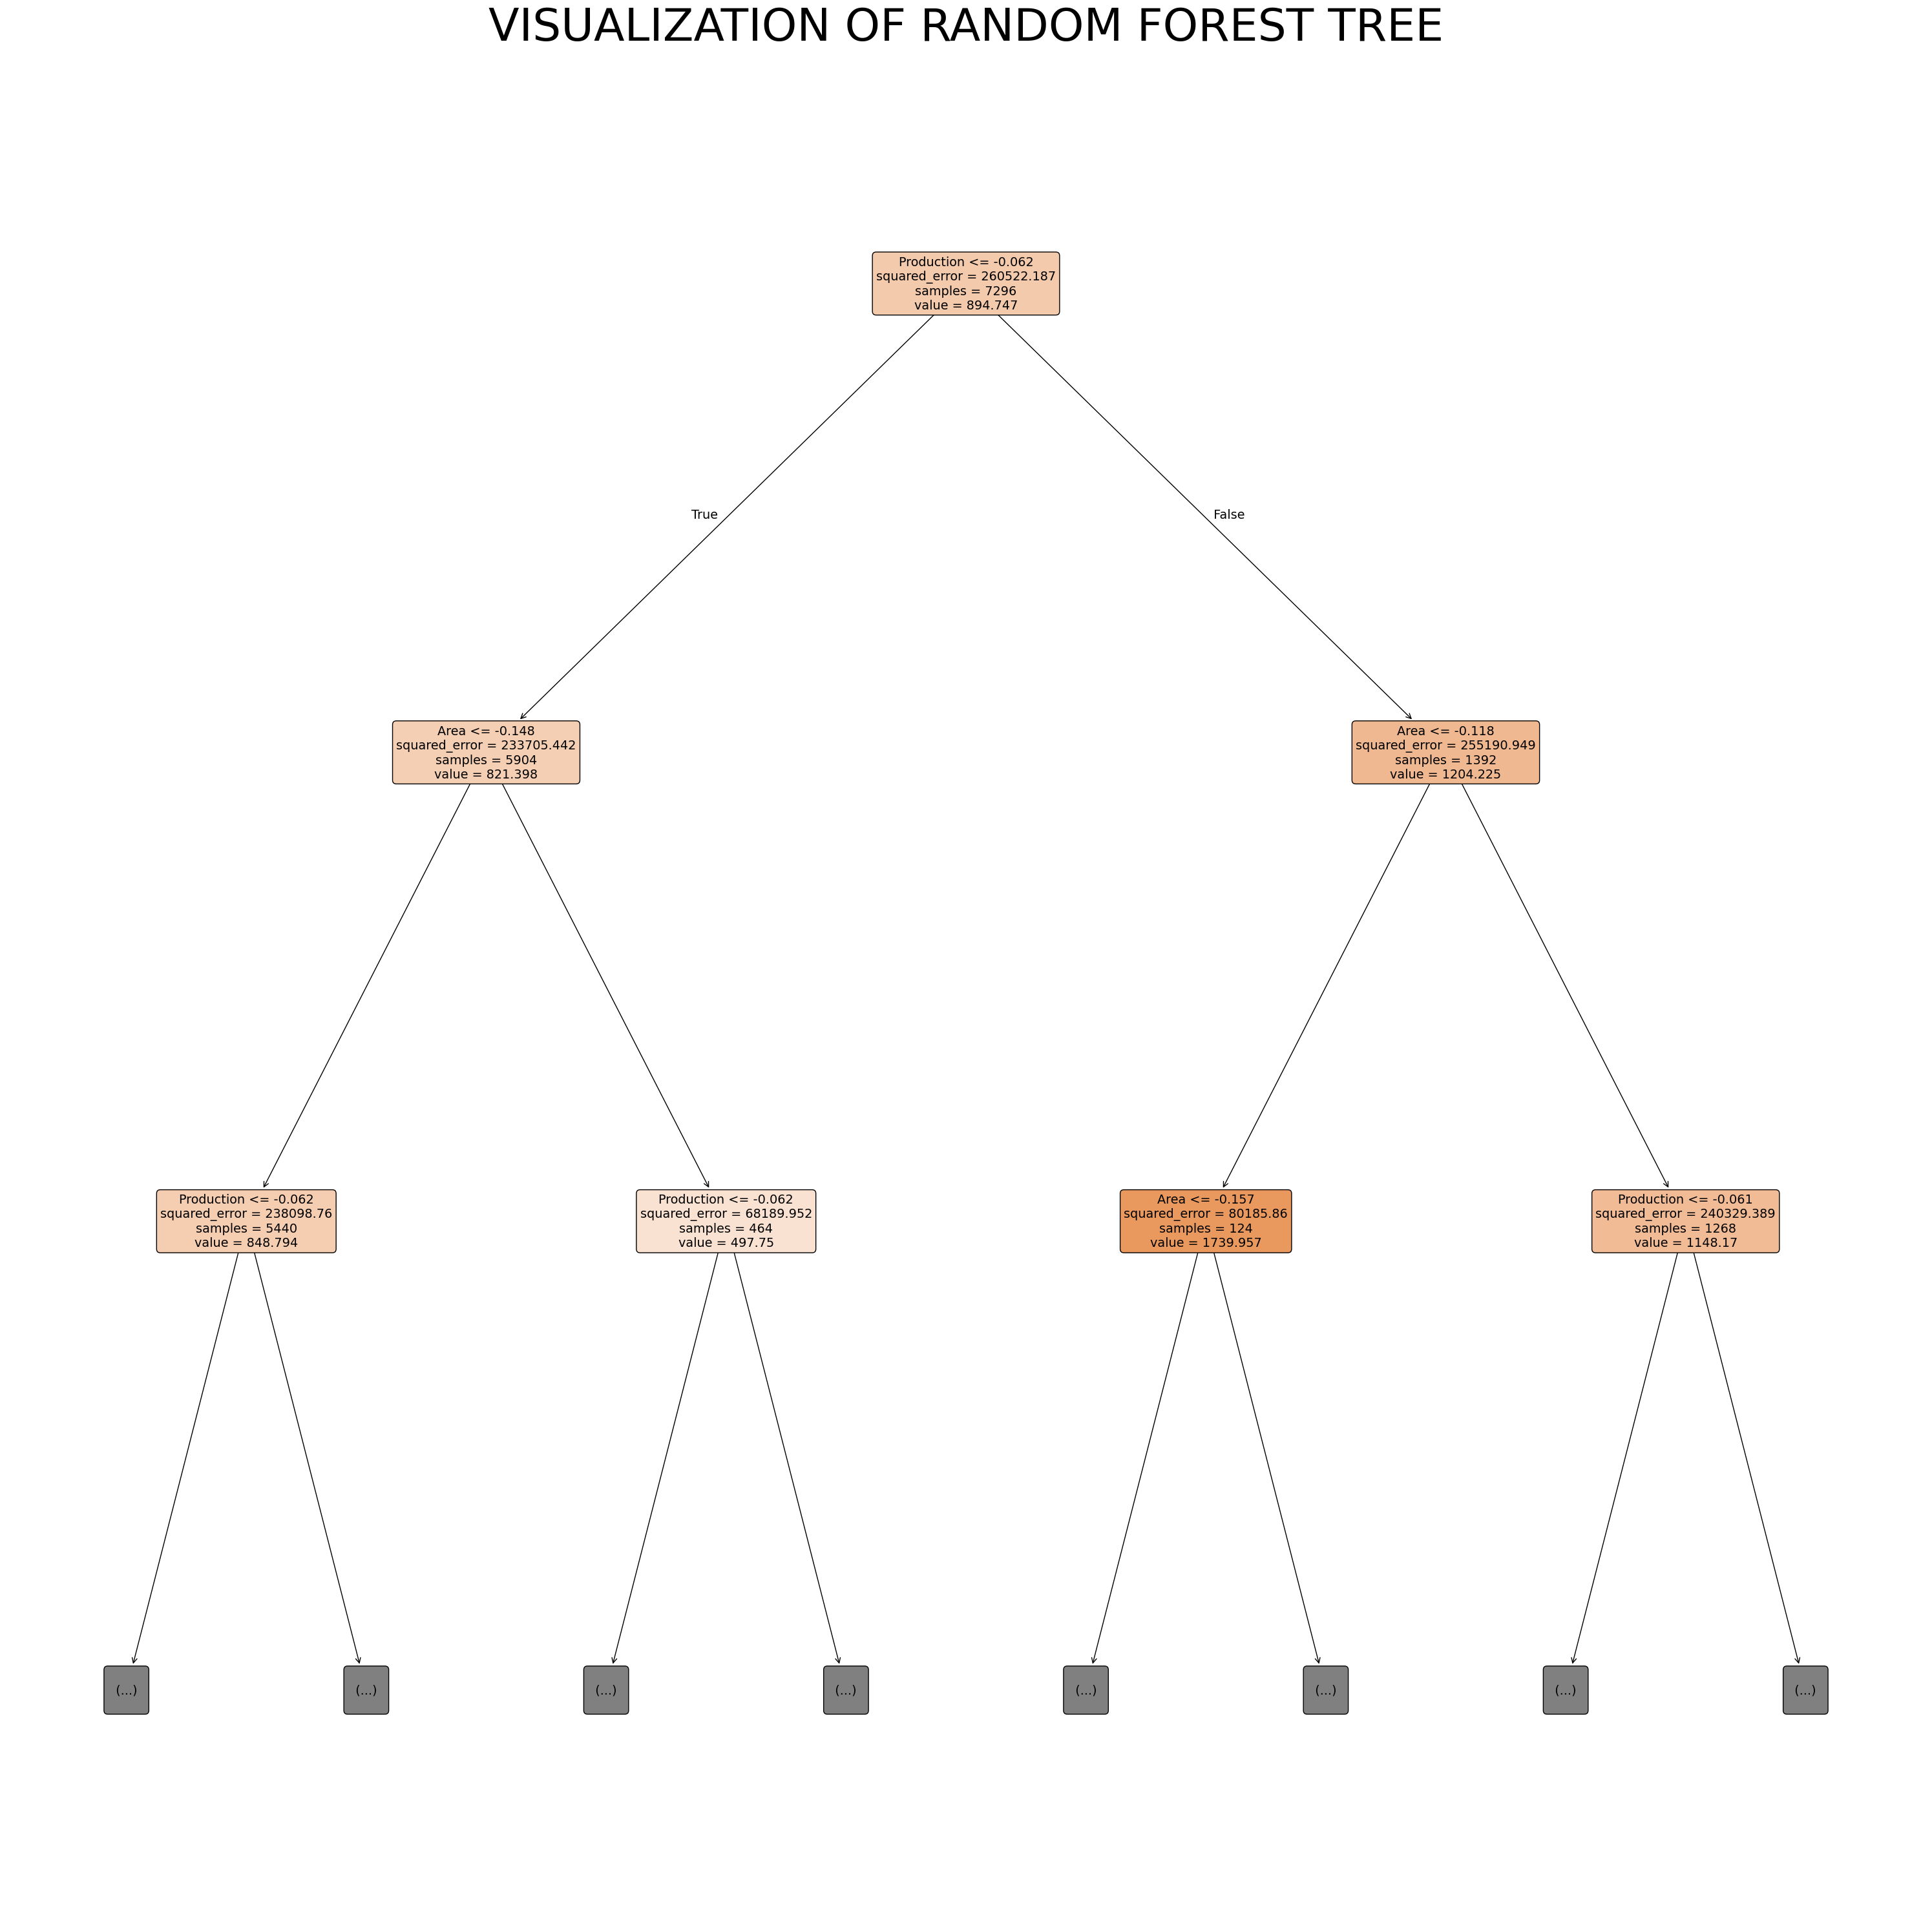

In [203]:
from sklearn.tree import plot_tree
est=model.estimators_[0]
plt.figure(figsize=(30,30))
plot_tree(est,feature_names=x.columns.tolist(),filled=True,rounded=True,max_depth=2)
plt.title("VISUALIZATION OF RANDOM FOREST TREE",fontsize=50)
plt.tight_layout()
plt.show()

In [206]:
import joblib 
joblib.dump(model,r"C:\Users\Avijit\Desktop\AgriAssure\AGRIYIELDPRO\MODEL\randomforest.pkl")

['C:\\Users\\Avijit\\Desktop\\AgriAssure\\AGRIYIELDPRO\\MODEL\\randomforest.pkl']

In [210]:
print(f"train r2score = {r2_score(ytrain,model.predict(xtrain))*100}")
print(f"test r2score = {r2_score(ytest,testpred)*100}")

train r2score = 93.35160774365362
test r2score = 90.11270109992365
